In [1]:
import pandas as pd

# Load your CSV again (includes close, AMA, etc.)
df = pd.read_csv('data/doge_usdt.csv', index_col='timestamp', parse_dates=True)

# If you saved AMA from the previous notebook, include it here too
# Otherwise, re-run AMA code here or re-calculate AMA again (quickest for now)


In [2]:
import pandas as pd

# Load the enhanced dataset with AMA
df = pd.read_csv('data/doge_usdt_with_ama.csv', index_col='timestamp', parse_dates=True)

# Quick check
print(df.columns)
df[['close', 'AMA']].tail()


Index(['open', 'high', 'low', 'close', 'volume', 'ret', 'vol', 'window',
       'AMA'],
      dtype='object')


,close,AMA
timestamp,,
2024-11-20,0.37778,0.281588
2024-11-21,0.38664,0.292962
2024-11-22,0.41277,0.305623
2024-11-23,0.43015,0.319561
2024-11-24,0.43023,0.333162


In [3]:
# Generate entry/exit signals based on AMA crossover
df['signal'] = 0  # default: no position

# When close crosses ABOVE AMA → Buy Signal (+1)
df.loc[(df['close'] > df['AMA']) & (df['close'].shift(1) <= df['AMA'].shift(1)), 'signal'] = 1

# When close crosses BELOW AMA → Sell Signal (-1)
df.loc[(df['close'] < df['AMA']) & (df['close'].shift(1) >= df['AMA'].shift(1)), 'signal'] = -1

# Forward fill the signal (hold position until a reversal)
df['position'] = df['signal'].replace(to_replace=0, method='ffill')

# Display a few rows
df[['close', 'AMA', 'signal', 'position']].dropna().head(10)


C:\Users\Admin\AppData\Local\Temp\ipykernel_19520\423764490.py:11: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df['position'] = df['signal'].replace(to_replace=0, method='ffill')


,close,AMA,signal,position
timestamp,,,,
2023-07-14,0.06849,0.068490,0,0
2023-07-15,0.07197,0.070230,1,1
2023-07-16,0.06952,0.069993,-1,-1
2023-07-17,0.06982,0.069950,0,-1
2023-07-18,0.06866,0.069692,0,-1
2023-07-19,0.07003,0.069748,1,1
2023-07-20,0.07062,0.069873,0,1
2023-07-21,0.07322,0.070291,0,1
2023-07-22,0.07047,0.070311,0,1


In [4]:
# 1. Calculate daily strategy returns:
# Position from yesterday * today's return
df['strategy_ret'] = df['position'].shift(1) * df['ret']

# 2. Cumulative returns (compounded over time)
df['cumulative_market'] = (1 + df['ret']).cumprod()
df['cumulative_strategy'] = (1 + df['strategy_ret']).cumprod()

# 3. Display last few rows
df[['cumulative_market', 'cumulative_strategy']].dropna().tail()


,cumulative_market,cumulative_strategy
timestamp,,
2024-11-20,5.515842,4.492718
2024-11-21,5.645204,4.598085
2024-11-22,6.026719,4.908834
2024-11-23,6.280479,5.115524
2024-11-24,6.281647,5.116475


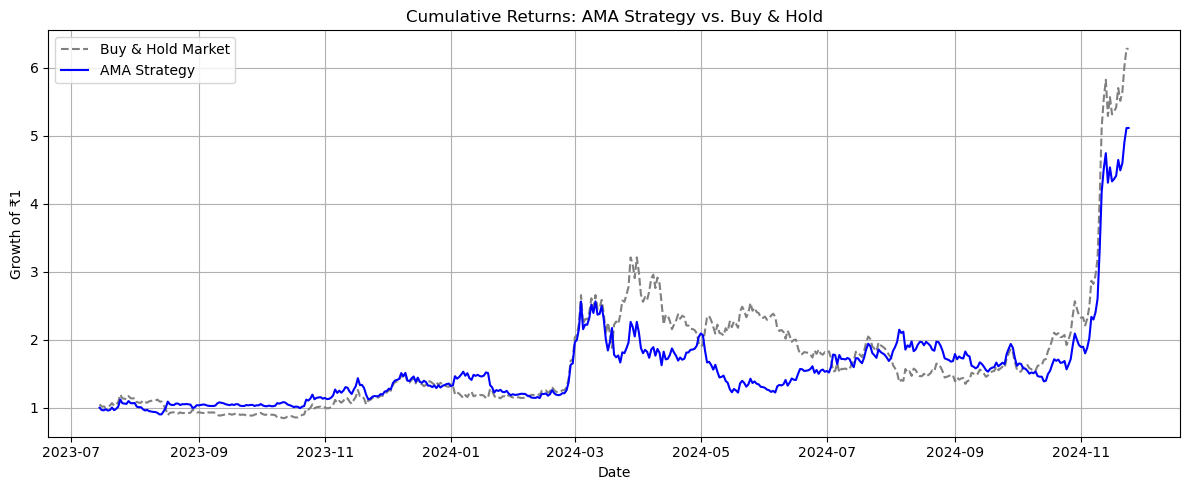

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df.index, df['cumulative_market'], label='Buy & Hold Market', linestyle='--', color='gray')
plt.plot(df.index, df['cumulative_strategy'], label='AMA Strategy', color='blue')
plt.title('Cumulative Returns: AMA Strategy vs. Buy & Hold')
plt.xlabel('Date')
plt.ylabel('Growth of ₹1')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [6]:
import numpy as np

# Drop any rows with NaNs to avoid errors
df_metrics = df.dropna(subset=['strategy_ret', 'ret'])

# Annualized Return
strategy_return = df_metrics['strategy_ret'].mean() * 252
market_return = df_metrics['ret'].mean() * 252

# Annualized Volatility
strategy_vol = df_metrics['strategy_ret'].std() * np.sqrt(252)
market_vol = df_metrics['ret'].std() * np.sqrt(252)

# Sharpe Ratio (risk-adjusted return)
risk_free_rate = 0.00
sharpe_strategy = (strategy_return - risk_free_rate) / strategy_vol
sharpe_market = (market_return - risk_free_rate) / market_vol

# Print results
print("📊 Performance Summary:")
print(f"Strategy Return (Annualized): {strategy_return:.2%}")
print(f"Market Return (Annualized):   {market_return:.2%}")
print(f"Strategy Volatility:          {strategy_vol:.2%}")
print(f"Market Volatility:            {market_vol:.2%}")
print(f"Sharpe Ratio (Strategy):      {sharpe_strategy:.2f}")
print(f"Sharpe Ratio (Market):        {sharpe_market:.2f}")


📊 Performance Summary:
Strategy Return (Annualized): 110.15%
Market Return (Annualized):   120.40%
Strategy Volatility:          75.31%
Market Volatility:            75.34%
Sharpe Ratio (Strategy):      1.46
Sharpe Ratio (Market):        1.60


In [7]:
import os
os.getcwd()


'C:\\Users\\Admin'